### DSP Homework 1 

## Checking Gibs phenomenon 

(1) Square pulse 

In [56]:
import numpy as np 
import matplotlib.pyplot as plt 

from scipy import signal 

In [57]:
def plot_zaxis(x, y, title="y", *args, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1) 
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_xlabel("t (secs)", loc='right')

    plt.plot(x, y, *args, **kwargs)
    plt.title(title) 
    # plt.xlabel("time (s)") 
    plt.ylim([-1, 2]); plt.grid()
    plt.show()

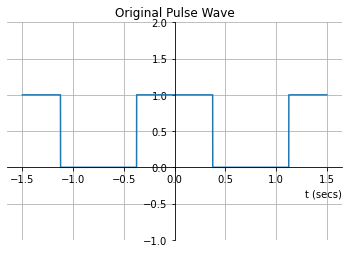

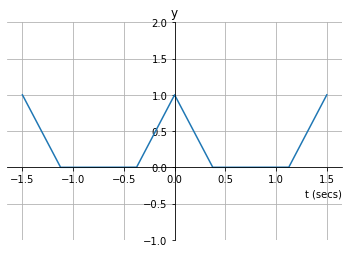

In [97]:
def triangle(t:np.ndarray, duty_cycle=0.5):
    pw = - (signal.sawtooth(t, 0.5)+1) / 2 
    pw += duty_cycle
    pw = np.clip(pw, a_min=0, a_max=None)
    pw /= duty_cycle
    return pw 

trange = np.arange(-1.5, 1.5, 1e-4) 
square_pulse = np.zeros_like(trange)

duty_cycle = 0.5
t_period = 1.5

pulse_wave = (1/2) * (signal.square(2 * np.pi * (1/t_period) * (trange + (duty_cycle * t_period)/2), duty=duty_cycle) + 1)
tpw = triangle(2 * np.pi * (1/t_period) * trange, duty_cycle=duty_cycle)
# triangle = -(signal.sawtooth(2 * np.pi * t_period * trange, 0.5) + 1) / 2
# triangle += duty_cycle
# triangle = np.clip(triangle, a_min=0, a_max=None) 
# triangle /= duty_cycle

# triangle = np.clip(triangle, a_min=0, a_max=None)
# triangle /= (1 - duty_cycle)

plot_zaxis(trange, pulse_wave, title="Original Pulse Wave")

plot_zaxis(trange, tpw)



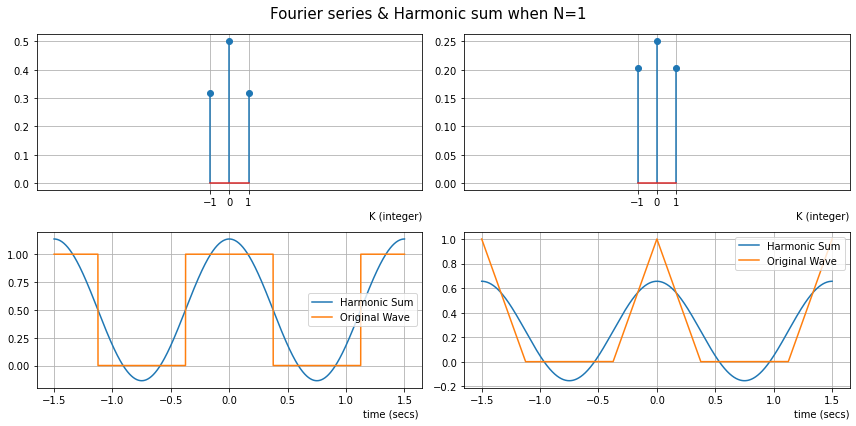

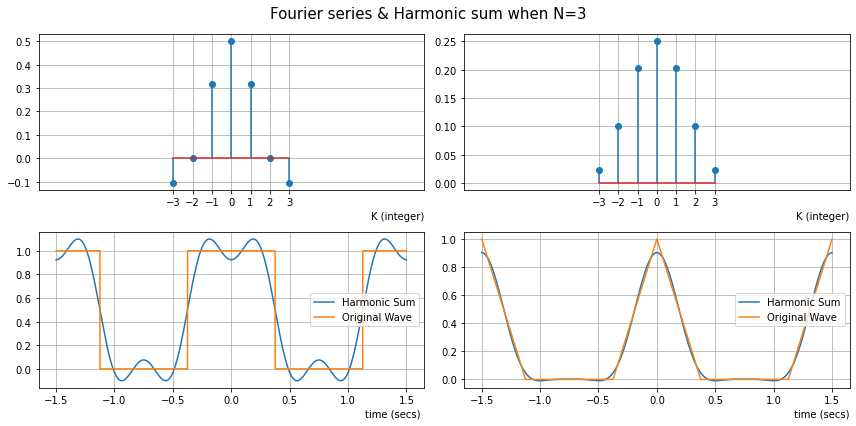

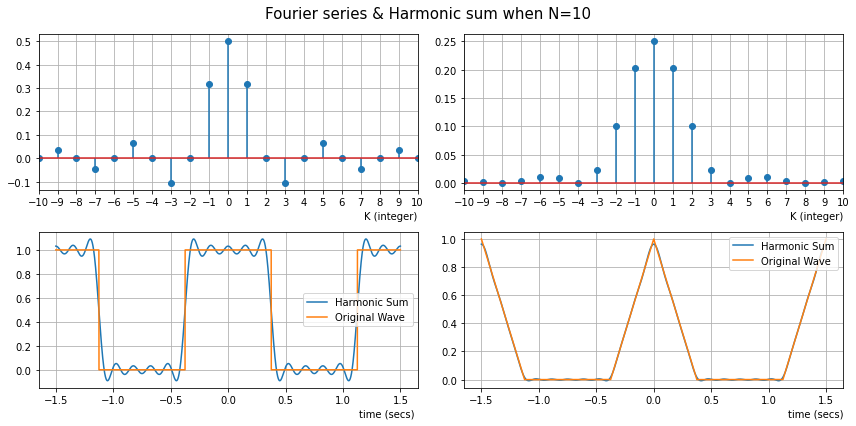

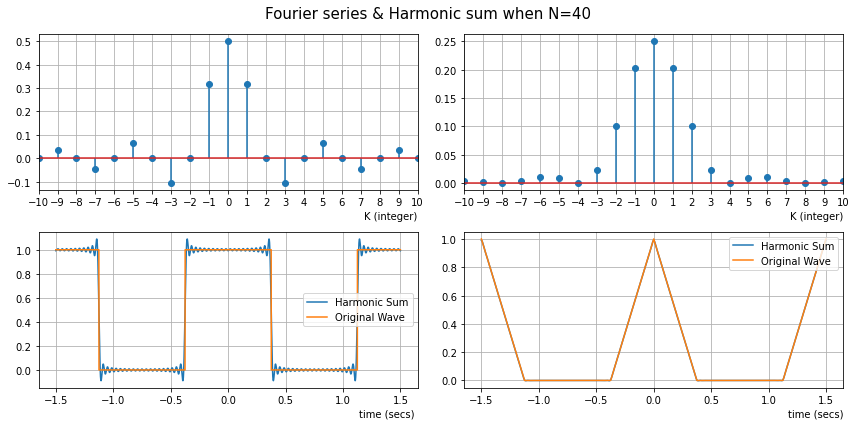

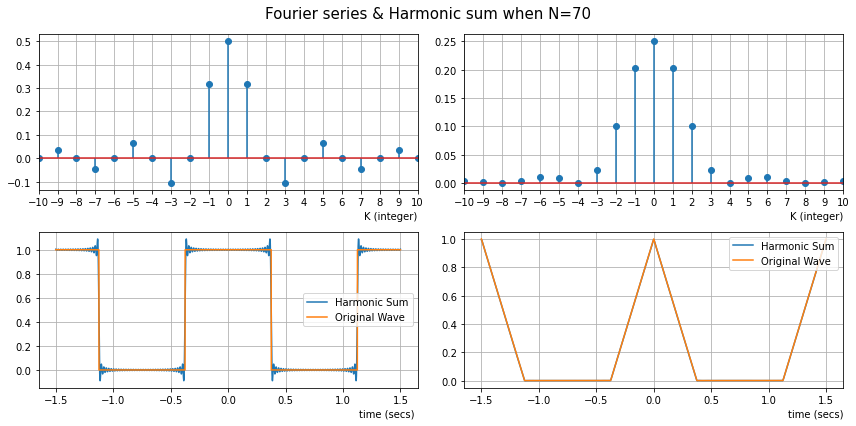

In [107]:

def harmonic_sum(N: int, coefficients: np.ndarray, fund_freq: float, trange: np.ndarray):
    """
    Compute the harmonic sum of given number (-N ~ N) Fourier coefficients
    Input: 
    N (int) : number of Fourier coeffiencts to sum up 
    coefficients (np.ndarray) : n-dimensional array of Fourier Coefficients 
    fund_freq(float) : fundamental frequency 
    trange (np.ndarray) : """
    k_lst = np.arange(-N, N+1, 1).reshape(-1, 1)
    summation = coefficients * np.exp(1j * k_lst * fund_freq * trange)
    summation = np.sum(summation, axis=0)
    return summation 

N_lst = [1, 3, 10, 40, 70]
dc = 0.5
tp = 1.5
trange = np.arange(-1.5, 1.5, 1e-4)

for N in N_lst:
    fund_freq = 2 * np.pi / tp 

    k_lst = np.arange(-N, N+1, 1).reshape(-1, 1)

    aks = dc * np.sinc(dc * k_lst)

    akt = (dc) * (np.sinc(dc * k_lst / 2))
    akt = (akt ** 2)

    recovered_square = harmonic_sum(N, aks, fund_freq, trange)
    recovered_triangle = harmonic_sum(N, akt, fund_freq, trange) 
    # ns = aks * np.exp(1j * k_lst * fund_freq * trange)
    # ns = np.sum(ns, axis=0)
    # nt = akt * np.exp(1j * k_lst * fund_freq * trange) 
    # nt = np.sum(nt, axis=0)


    fig = plt.figure(figsize=(12, 6))
    plt.suptitle(f"Fourier series & Harmonic sum when N={N}", fontsize=15)

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_xticks(k_lst)
    ax1.set_xlabel("K (integer)", loc="right")
    ax1.set_xlim([-10, 10])
    ax1.grid()
    plt.stem(k_lst, aks)

    ax2 = fig.add_subplot(2, 2, 3) 
    ax2.set_xlabel("time (secs) ", loc="right")
    plt.plot(trange, recovered_square.real, trange, pulse_wave)
    
    ax2.legend(["Harmonic Sum", "Original Wave"])
    ax2.grid()

    ax3 =fig.add_subplot(2, 2, 2) 
    ax3.set_xticks(k_lst)
    ax3.set_xlabel("K (integer)", loc='right') 
    ax3.set_xlim([-10, 10]) 
    ax3.grid()
    plt.stem(k_lst, akt)

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set_xlabel("time (secs)", loc='right') 
    ax4.grid()
    plt.plot(trange, recovered_triangle.real, trange, tpw)
    ax4.legend(["Harmonic Sum", "Original Wave"])

    plt.tight_layout()
    plt.show() 
    

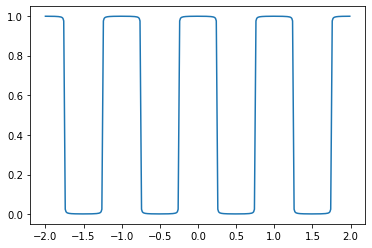

In [62]:
ns = aks * np.exp(1j * k_lst * fund_freq * trange)
ns = np.sum(ns, axis=0)

plt.figure()
plt.plot(trange, ns.real)

<StemContainer object of 3 artists>

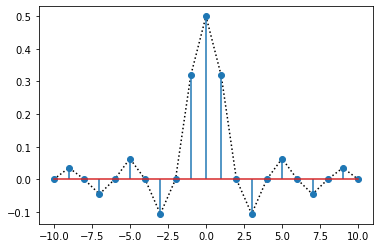

In [47]:
plt.figure()
plt.plot(k_lst, aks, ':k', label="envelope")
plt.stem(k_lst, aks)